<script src="https://kit.fontawesome.com/d481cf1ff3.js" crossorigin="anonymous"></script>

<br>
<img src="https://drive.google.com/uc?export=view&id=1nmL3E8OmZgB2qjKixlJprVuTxlox3O07" width="85" height="85">
<br>
***
# COVID-19 DATA

<div><table style="width:600px; color:#ff0000;" align="left">
    <tr>
    <td style="width:100px; text-align:center; background-color:#edeeef; padding:0"><i class="fa fa-heartbeat fa-5x" aria-hidden="true"></i></td>
    <td style="text-align:left; background-color:#ffffff; padding:0">
    <div class="alert alert-block alert-danger">
    <b>Steps:</b>
        <ul class="fa-ul">
          <li><i class="fa-li fa fa-square"></i>Pull in data from data.world Website</li>
          <li><i class="fa-li fa fa-square"></i>Put it into Pandas and have fun</li>
        </ul>
    </div>
    </td>
    
</tr>
</table></div>
<br><br><br><br><br><br>

> * data.world source stopped updating on June 4, 2020
<i class="fas fa-virus"></i>

In [1]:
import pandas as pd
import numpy as np
import time

import seaborn as sb
import matplotlib.pyplot as plt

from pylab import rcParams

# Set ipython's max row display
pd.set_option('display.max_row', 1000)

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [3]:
url = 'https://query.data.world/s/oovglts3s5iol734726yb3pfshnd3n'
tic = time.perf_counter()
covid_df = pd.read_csv(url)
toc = time.perf_counter()

print(f"Downloaded the data in {(toc - tic)/60:0.4f} minutes")

C:\Users\Chester Qualls\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Downloaded the data in 0.2054 minutes


In [4]:
#Convert the date fields to a date format.
tic = time.perf_counter()  

covid_df['Date'] = pd.to_datetime(covid_df['Date'])
#covid_df['Prep_Flow_Runtime'] = pd.to_datetime(covid_df['Prep_Flow_Runtime'])

#covid_df['Population_Count'] = covid_df['Population_Count'].fillna(0)
#covid_df['Population_Count'] = covid_df['Population_Count'].astype(object)

toc = time.perf_counter()

print(f"Converted the data in {(toc - tic)/60:0.2f} minutes")
#print('Elaspsed time in minutes',(toc - tic)/60)
print('***********************************')    
covid_df.info()

Converted the data in 2.13 minutes
***********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950670 entries, 0 to 950669
Data columns (total 18 columns):
Case_Type                               950670 non-null object
People_Total_Tested_Count               6048 non-null float64
Cases                                   950670 non-null int64
Difference                              950670 non-null int64
Date                                    950670 non-null datetime64[ns]
Combined_Key                            950670 non-null object
Country_Region                          950670 non-null object
Province_State                          901260 non-null object
Admin2                                  878580 non-null object
iso2                                    949590 non-null object
iso3                                    949860 non-null object
FIPS                                    849690 non-null float64
Lat                                     921780 non-null 

In [6]:
#Do a little math
covid_df['100k_quotient'] = covid_df['Population_Count']/100000
covid_df['per_ht'] = covid_df['Difference']/covid_df['100k_quotient']#May not need the 100k stuff here, but it is used in a few places

covid_df['Lat2'] = covid_df['Lat'].round(0)

print ('Done')

Done


In [5]:
covid_df.to_csv("c:/Users/Chester Qualls/Desktop/Customers/Am Tech/data-world-covid-19-2020-11-24.csv")

In [7]:
#print("Table Names", covid_df['Table_Names'].unique())
print("Case Type", covid_df['Case_Type'].unique())


Case Type ['Confirmed' 'Deaths']


In [8]:
print("Arizona Counties", covid_df.loc[(covid_df['Province_State'] == 'Arizona', 'Admin2')].unique())

Arizona Counties ['Yuma' 'Navajo' 'Pinal' 'La Paz' 'Mohave' 'Coconino' 'Santa Cruz'
 'Maricopa' 'Gila' 'Yavapai' 'Out of AZ' 'Apache' 'Graham' 'Cochise' 'Pima'
 'Unassigned' 'Greenlee']


In [9]:
covid_df.groupby(['Country_Region','Province_State'], as_index=False)['Population_Count','per_ht'].mean().sort_values('Country_Region')

,Country_Region,Province_State,Population_Count,per_ht
0,Australia,Australian Capital Territory,4.281000e+05,0.095166
1,Australia,New South Wales,8.118000e+06,0.144079
2,Australia,Northern Territory,2.456000e+05,0.043733
3,Australia,Queensland,5.115500e+06,0.077180
4,Australia,South Australia,1.756500e+06,0.093621
5,Australia,Tasmania,5.355000e+05,0.166684
6,Australia,Victoria,6.629900e+06,0.094968
7,Australia,Western Australia,2.630600e+06,0.084617
19,Canada,Yukon,4.107800e+04,0.099179
18,Canada,Saskatchewan,1.181666e+06,0.206551


In [10]:
covid_df.groupby(['Lat2','Case_Type'], as_index=False)['Difference','per_ht'].sum().sort_values('Lat2')

,Lat2,Case_Type,Difference,per_ht
0,-52.0,Confirmed,13,373.241459
1,-52.0,Deaths,0,0.000000
2,-43.0,Confirmed,227,42.390289
3,-43.0,Deaths,13,2.427638
4,-41.0,Confirmed,1497,31.043709
5,-41.0,Deaths,21,0.435483
6,-38.0,Confirmed,7789,36.681369
7,-38.0,Deaths,332,0.966252
8,-36.0,Confirmed,30063,157.264445
9,-36.0,Deaths,323,1.689666


In [10]:
print("Country Region", covid_df['Country_Region'].unique())

Country Region ['Switzerland' 'Antigua and Barbuda' 'Cyprus' 'Jamaica' 'Belize'
 'Central African Republic' 'Greece' 'Netherlands' 'United Kingdom'
 'France' 'Poland' 'Canada' 'China' 'Kazakhstan' 'South Sudan' 'Croatia'
 'Chad' 'Hungary' 'Sudan' 'Singapore' 'Bulgaria' 'Saint Lucia' 'Nepal'
 'Peru' 'United Arab Emirates' 'Sierra Leone' 'Brazil' 'Liechtenstein'
 'Pakistan' 'Equatorial Guinea' 'Thailand' 'Azerbaijan' 'Bahrain' 'Kenya'
 'Cabo Verde' 'Germany' 'Malta' 'Togo' 'Montenegro' 'North Macedonia'
 'Tunisia' 'Belarus' 'Congo (Brazzaville)' 'Dominica' 'Austria' 'Paraguay'
 'Afghanistan' 'Angola' 'Yemen' 'Iraq' 'Holy See' 'Brunei'
 'Congo (Kinshasa)' 'Somalia' 'Botswana' 'New Zealand' 'Uganda' 'Barbados'
 'Djibouti' 'Norway' 'Kyrgyzstan' 'Sri Lanka' 'Syria' 'Maldives' 'Georgia'
 'Timor-Leste' 'El Salvador' 'Mauritius' 'Oman' 'Senegal' 'Rwanda'
 'Bahamas' 'Monaco' 'Mozambique' 'Morocco' 'Italy' 'Vietnam' 'Andorra'
 'Albania' 'Ethiopia' 'Guatemala' 'Seychelles' 'Argentina' 'Uruguay'
 '

In [6]:
# I previously created a variable covid_sum for this but don't really need to keep that in memory.

pd.pivot_table(covid_df.loc[(covid_df['Province_State'] == 'Arizona')|(covid_df['Province_State'] == 'New Mexico')],
                           values=['Cases'], index=['Province_State','Admin2'], 
                           columns=['Case_Type'], aggfunc='max')

Cases       
Case_Type                 Confirmed Deaths
Province_State Admin2                     
Arizona        Apache          1637     45
               Cochise          105      5
               Coconino        1221     85
               Gila              39      1
               Graham            41      1
               Greenlee           8      0
               La Paz           110      1
               Maricopa       11229    471
               Mohave           428     49
               Navajo          2042     67
               Out of AZ          0      0
               Pima            2669    202
               Pinal            948     40
               Santa Cruz       462      0
               Unassigned         0     42
               Yavapai          307      7
               Yuma            1643     23
New Mexico     Bernalillo      1543     73
               Catron             2      1
               Chaves            51      2
               Cibola           148      6
               Colfax             5      0
               Curry             57      0
               De Baca            1      0
               Dona Ana         509      3
               Eddy              26      1
               Grant             16      0
               Guadalupe         20      0
               Harding            1      0
               Hidalgo            1      0
               Lea               26      0
               Lincoln            5      0
               Los Alamos         6      0
               Luna              10      1
               McKinley        2542    124
               Mora               0      0
               Otero             23      3
               Out of NM          0      0
               Quay               5      1
               Rio Arriba        52      1
               Roosevelt         42      0
               San Juan        1842    129
               San Miguel        15      0
               Sandoval         578     27
               Santa Fe         150      3
               Sierra             1      0
               Socorro           54      5
               Taos              31      0
               Torrance          33      1
               Unassigned       477      6
               Union              4      0
               Valencia          80      2

In [6]:
country_name = 'US'
state_name = 'Arizona'
county_name = 'Maricopa'

In [15]:
covid_df.loc[(covid_df['Province_State'] == state_name) & (covid_df['Admin2'] == county_name)].sort_values(by=['Date'])

,Case_Type,People_Total_Tested_Count,Cases,Difference,Date,Combined_Key,Country_Region,Province_State,Admin2,iso2,...,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count,Data_Source,Prep_Flow_Runtime,100k_quotient,per_ht,Lat2
882287,Confirmed,NaN,0,0,2020-01-22,"Maricopa, Arizona, US",US,Arizona,Maricopa,US,...,4013.0,33.348359,-112.491815,4485414.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/28/2020 12:37:44 AM,44.85414,0.000000,33.0
881663,Deaths,NaN,0,0,2020-01-22,"Maricopa, Arizona, US",US,Arizona,Maricopa,US,...,4013.0,33.348359,-112.491815,4485414.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/28/2020 12:37:44 AM,44.85414,0.000000,33.0
676579,Deaths,NaN,0,0,2020-01-23,"Maricopa, Arizona, US",US,Arizona,Maricopa,US,...,4013.0,33.348359,-112.491815,4485414.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/28/2020 12:37:44 AM,44.85414,0.000000,33.0
450096,Confirmed,NaN,0,0,2020-01-23,"Maricopa, Arizona, US",US,Arizona,Maricopa,US,...,4013.0,33.348359,-112.491815,4485414.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/28/2020 12:37:44 AM,44.85414,0.000000,33.0
126575,Confirmed,NaN,0,0,2020-01-24,"Maricopa, Arizona, US",US,Arizona,Maricopa,US,...,4013.0,33.348359,-112.491815,4485414.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/28/2020 12:37:44 AM,44.85414,0.000000,33.0
462384,Deaths,NaN,0,0,2020-01-24,"Maricopa, Arizona, US",US,Arizona,Maricopa,US,...,4013.0,33.348359,-112.491815,4485414.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/28/2020 12:37:44 AM,44.85414,0.000000,33.0
548164,Confirmed,NaN,0,0,2020-01-25,"Maricopa, Arizona, US",US,Arizona,Maricopa,US,...,4013.0,33.348359,-112.491815,4485414.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/28/2020 12:37:44 AM,44.85414,0.000000,33.0
652559,Deaths,NaN,0,0,2020-01-25,"Maricopa, Arizona, US",US,Arizona,Maricopa,US,...,4013.0,33.348359,-112.491815,4485414.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/28/2020 12:37:44 AM,44.85414,0.000000,33.0
529058,Confirmed,NaN,1,1,2020-01-26,"Maricopa, Arizona, US",US,Arizona,Maricopa,US,...,4013.0,33.348359,-112.491815,4485414.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/28/2020 12:37:44 AM,44.85414,0.022294,33.0
98595,Deaths,NaN,0,0,2020-01-26,"Maricopa, Arizona, US",US,Arizona,Maricopa,US,...,4013.0,33.348359,-112.491815,4485414.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/28/2020 12:37:44 AM,44.85414,0.000000,33.0


In [16]:
# previously created a variable called c19_stats but not needed

covid_df.dropna(subset=['People_Hospitalized_Cumulative_Count', 'People_Total_Tested_Count']).loc[(covid_df['Province_State'] == state_name) & (covid_df['Case_Type'] == 'Confirmed')].sort_values(by=['Date','Case_Type'], ascending=True)

,Case_Type,People_Total_Tested_Count,Cases,Difference,Date,Combined_Key,Country_Region,Province_State,Admin2,iso2,...,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count,Data_Source,Prep_Flow_Runtime,100k_quotient,per_ht,Lat2
205359,Confirmed,42109.0,0,0,2020-04-12,"Unassigned, Arizona, US",US,Arizona,Unassigned,US,...,NaN,NaN,NaN,NaN,0.0,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/28/2020 12:37:44 AM,NaN,NaN,NaN
386016,Confirmed,43347.0,0,0,2020-04-13,"Unassigned, Arizona, US",US,Arizona,Unassigned,US,...,NaN,NaN,NaN,NaN,525.0,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/28/2020 12:37:44 AM,NaN,NaN,NaN
336061,Confirmed,44096.0,0,0,2020-04-14,"Unassigned, Arizona, US",US,Arizona,Unassigned,US,...,NaN,NaN,NaN,NaN,580.0,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/28/2020 12:37:44 AM,NaN,NaN,NaN
188326,Confirmed,45310.0,0,0,2020-04-15,"Unassigned, Arizona, US",US,Arizona,Unassigned,US,...,NaN,NaN,NaN,NaN,590.0,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/28/2020 12:37:44 AM,NaN,NaN,NaN
652323,Confirmed,47398.0,0,0,2020-04-16,"Unassigned, Arizona, US",US,Arizona,Unassigned,US,...,NaN,NaN,NaN,NaN,578.0,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/28/2020 12:37:44 AM,NaN,NaN,NaN
357981,Confirmed,49230.0,0,0,2020-04-17,"Unassigned, Arizona, US",US,Arizona,Unassigned,US,...,NaN,NaN,NaN,NaN,566.0,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/28/2020 12:37:44 AM,NaN,NaN,NaN
237256,Confirmed,51045.0,0,0,2020-04-18,"Unassigned, Arizona, US",US,Arizona,Unassigned,US,...,NaN,NaN,NaN,NaN,566.0,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/28/2020 12:37:44 AM,NaN,NaN,NaN
514670,Confirmed,52990.0,0,0,2020-04-19,"Unassigned, Arizona, US",US,Arizona,Unassigned,US,...,NaN,NaN,NaN,NaN,631.0,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/28/2020 12:37:44 AM,NaN,NaN,NaN
491475,Confirmed,54500.0,0,0,2020-04-20,"Unassigned, Arizona, US",US,Arizona,Unassigned,US,...,NaN,NaN,NaN,NaN,637.0,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/28/2020 12:37:44 AM,NaN,NaN,NaN
448478,Confirmed,55152.0,0,0,2020-04-21,"Unassigned, Arizona, US",US,Arizona,Unassigned,US,...,NaN,NaN,NaN,NaN,637.0,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/28/2020 12:37:44 AM,NaN,NaN,NaN


In [7]:
#Previously had variable called covid_timeline, but was not necessary

print('***Data for', state_name,'/', county_name,'***')
covid_df.loc[(covid_df['Province_State'] == 'Arizona') & (covid_df['Admin2'] == 'Maricopa')].groupby(['Date','Case_Type','Cases'],
                    as_index=False).agg({'Difference': ['sum']}).rename(columns={'Case_Type':'Type','Cases':'Total', 'Difference':'Daily','sum':''}, inplace=False)


***Data for Arizona / Maricopa ***


,Date,Type,Total,Daily
,,,,
0,2020-01-22,Confirmed,0,0
1,2020-01-22,Deaths,0,0
2,2020-01-23,Confirmed,0,0
3,2020-01-23,Deaths,0,0
4,2020-01-24,Confirmed,0,0
5,2020-01-24,Deaths,0,0
6,2020-01-25,Confirmed,0,0
7,2020-01-25,Deaths,0,0
8,2020-01-26,Confirmed,1,1


In [17]:
#Check for accurate
#Previously had variable called covid_bycountry, but was not necessary
pd.pivot_table((covid_df),
                           values=['Difference'], index=['Country_Region'], 
                           columns=['Case_Type'], aggfunc='sum')

Difference        
Case_Type                         Confirmed  Deaths
Country_Region                                     
Afghanistan                           12456     227
Albania                                1050      33
Algeria                                8857     623
Andorra                                 763      51
Angola                                   71       4
Antigua and Barbuda                      25       3
Argentina                             13933     500
Armenia                                7774      98
Australia                              7150     103
Austria                               16591     645
Azerbaijan                             4568      54
Bahamas                                 100      11
Bahrain                                9692      15
Bangladesh                            38292     544
Barbados                                 92       7
Belarus                               38956     214
Belgium                               57592    9364
Belize                                   18       2
Benin                                   210       3
Bhutan                                   28       0
Bolivia                                7768     280
Bosnia and Herzegovina                 2435     151
Botswana                                 35       1
Brazil                               411821   25598
Brunei                                  141       2
Bulgaria                               2460     133
Burkina Faso                            845      53
Burma                                   206       6
Burundi                                  42       1
Cabo Verde                              390       4
Cambodia                                124       0
Cameroon                               5436     175
Canada                                88975    6875
Central African Republic                702       1
Chad                                    715      64
Chile                                 82289     841
China                                 84106    4638
Colombia                              24104     803
Comoros                                  87       2
Congo (Brazzaville)                     571      19
Congo (Kinshasa)                       2546      68
Costa Rica                              984      10
Cote d'Ivoire                          2556      31
Croatia                                2244     101
Cruise Ship                             735      16
Cuba                                   1974      82
Cyprus                                  939      17
Czechia                                9086     317
Denmark                               11680     565
Djibouti                               2697      18
Dominica                                 16       0
Dominican Republic                    15723     474
Ecuador                               38103    3275
Egypt                                 19666     816
El Salvador                            2109      39
Equatorial Guinea                      1043      12
Eritrea                                  39       0
Estonia                                1840      66
Eswatini                                272       2
Ethiopia                                731       6
Fiji                                     18       0
Finland                                6692     313
France                               183038   28599
Gabon                                  2319      14
Gambia                                   25       1
Georgia                                 735      12
Germany                              181524    8428
Ghana                                  7303      34
Greece                                 2903     173
Grenada                                  23       0
Guatemala                              4145      68
Guinea                                 3275      20
Guinea-Bissau                          1195       7
Guyana                                  139      11
Haiti                        

In [18]:
covid_df.groupby(['Country_Region','Case_Type']).agg({'Difference': ['sum'],
                                                      'per_ht': ['sum']})


Difference         per_ht
                                                  sum            sum
Country_Region                   Case_Type                          
Afghanistan                      Confirmed      12456      31.997254
                                 Deaths           227       0.583123
Albania                          Confirmed       1050      36.486205
                                 Deaths            33       1.146709
Algeria                          Confirmed       8857      20.197923
                                 Deaths           623       1.420719
Andorra                          Confirmed        763     987.510516
                                 Deaths            51      66.006601
Angola                           Confirmed         71       0.216027
                                 Deaths             4       0.012171
Antigua and Barbuda              Confirmed         25      25.528960
                                 Deaths             3       3.063475
Argentina                        Confirmed      13933      30.828101
                                 Deaths           500       1.106298
Armenia                          Confirmed       7774     262.348502
                                 Deaths            98       3.307197
Australia                        Confirmed       7150     209.398110
                                 Deaths           103       4.712960
Austria                          Confirmed      16591     184.213448
                                 Deaths           645       7.161574
Azerbaijan                       Confirmed       4568      45.052975
                                 Deaths            54       0.532588
Bahamas                          Confirmed        100      25.429246
                                 Deaths            11       2.797217
Bahrain                          Confirmed       9692     569.587261
                                 Deaths            15       0.881532
Bangladesh                       Confirmed      38292      23.251043
                                 Deaths           544       0.330319
Barbados                         Confirmed         92      32.014365
                                 Deaths             7       2.435876
Belarus                          Confirmed      38956     412.262426
                                 Deaths           214       2.264713
Belgium                          Confirmed      57592     496.927594
                                 Deaths          9364      80.796465
Belize                           Confirmed         18       4.526924
                                 Deaths             2       0.502992
Benin                            Confirmed        210       1.732216
                                 Deaths             3       0.024746
Bhutan                           Confirmed         28       3.628767
                                 Deaths             0       0.000000
Bolivia                          Confirmed       7768      66.546566
                                 Deaths           280       2.398692
Bosnia and Herzegovina           Confirmed       2435      74.219363
                                 Deaths           151       4.602515
Botswana                         Confirmed         35       1.488333
                                 Deaths             1       0.042524
Brazil                           Confirmed     411821     193.743952
                                 Deaths         25598      12.042751
Brunei                           Confirmed        141      32.229824
                                 Deaths             2       0.457161
Bulgaria                         Confirmed       2460      35.403605
                                 Deaths           133       1.914097
Burkina Faso                     Confirmed        845       4.042428
                                 Deaths            53       0.253549
Burma                            Confirmed        206       0.378608
                                 Deaths  

Text(0,0.5,'MEAN DIFFERENCE EACH DAY')

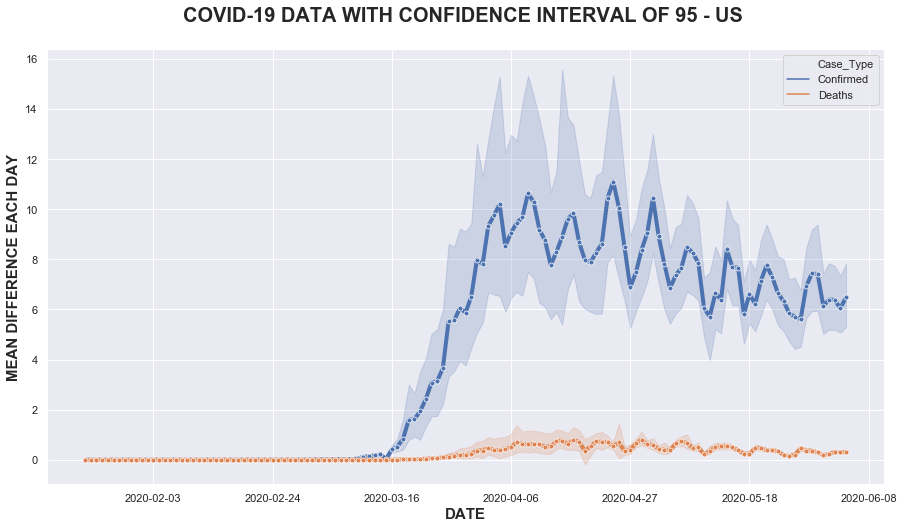

In [79]:
covid_bydate = covid_df.loc[(covid_df['Country_Region'] == country_name)
         & (covid_df['Date'] >= '1/22/2020')]

#Begin Graph
rcParams['figure.figsize'] = 15, 8

sb.set(style="darkgrid")
ax = sb.lineplot(y=('Difference'), x='Date', hue='Case_Type', hue_order=('Confirmed','Deaths'), linewidth=4, marker='.',ci=95 , markersize=10, data=covid_bydate)

ax.set_title(f"COVID-19 DATA WITH CONFIDENCE INTERVAL OF 95 - {country_name} ",fontweight='bold',fontsize=20,position=[.5,1.05])
#ax.set_xticklabels('Date', rotation = 45)
ax.set_xlabel('DATE',fontweight='bold',fontsize=15)
ax.set_ylabel('MEAN DIFFERENCE EACH DAY',fontweight='bold',fontsize=15)

In [9]:
del covid_bydate

In [80]:
#covid_bydate[['Date','People_Hospitalized_Cumulative_Count']].dropna(axis=0).sort_values(by=['Date'])
covid_bydate[['Date','Province_State','People_Hospitalized_Cumulative_Count']].sort_values(by=['Date']).loc[(covid_df['People_Hospitalized_Cumulative_Count'] > 0) & (covid_df['Province_State'] == state_name)]

,Date,Province_State,People_Hospitalized_Cumulative_Count
473925,2020-04-13,Arizona,525.0
631213,2020-04-13,Arizona,525.0
600738,2020-04-14,Arizona,580.0
345494,2020-04-14,Arizona,580.0
177166,2020-04-15,Arizona,590.0
567835,2020-04-15,Arizona,590.0
788320,2020-04-16,Arizona,578.0
758004,2020-04-16,Arizona,578.0
777069,2020-04-17,Arizona,566.0
359370,2020-04-17,Arizona,566.0


In [25]:
# This variable is used in the next few graphs but created in place when needed so can clean this out of memory whenever.
del covid_state

Text(0,0.5,'MEAN DIFFERENCE EACH DAY')

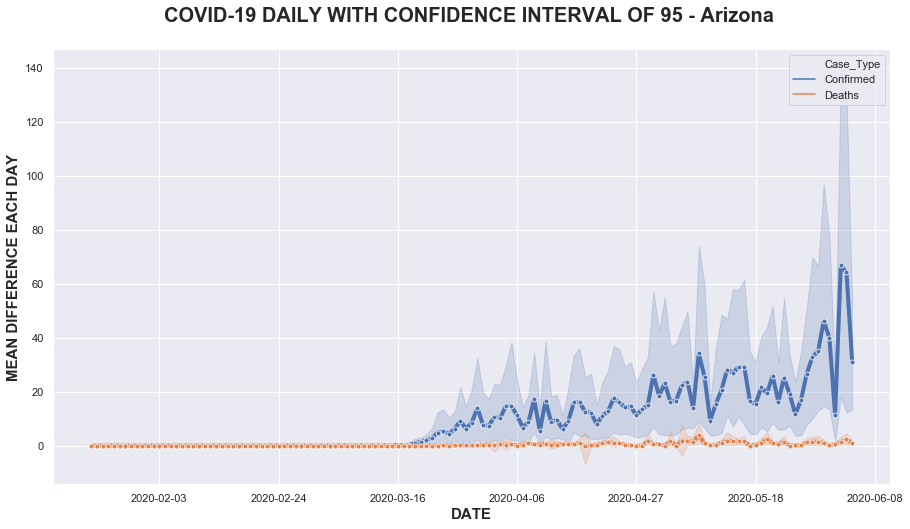

In [81]:
covid_state = covid_df.loc[(covid_df['Province_State'] == state_name)]

rcParams['figure.figsize'] = 15, 8

sb.set(style="darkgrid")
ax = sb.lineplot(y=('Difference'), x='Date', hue='Case_Type', hue_order=('Confirmed','Deaths'), linewidth=4, marker='.',ci=95 , markersize=10, data=covid_state)

ax.set_title(f"COVID-19 DAILY WITH CONFIDENCE INTERVAL OF 95 - {state_name} ",fontweight='bold',fontsize=20,position=[.5,1.05])
#ax.set_xticklabels('Date', rotation = 45)
ax.set_xlabel('DATE',fontweight='bold',fontsize=15)
ax.set_ylabel('MEAN DIFFERENCE EACH DAY',fontweight='bold',fontsize=15)

C:\Users\Chester Qualls\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


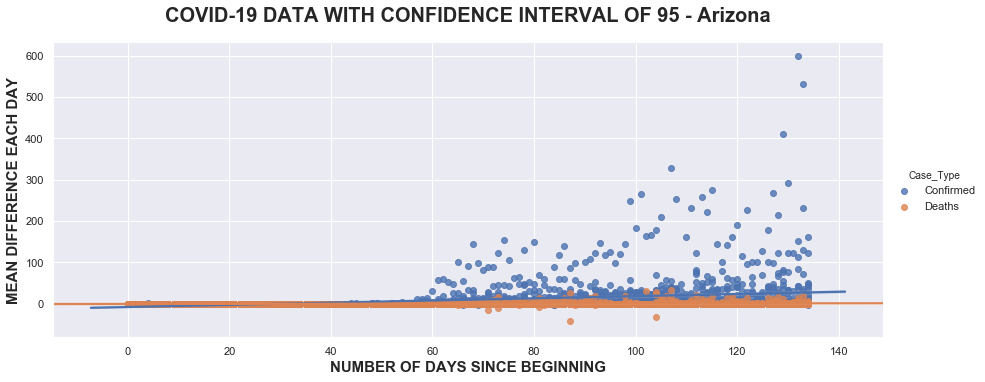

In [82]:
covid_state = covid_df.loc[(covid_df['Province_State'] == state_name)]

covid_state['date_delta'] = (covid_state['Date'] - covid_state['Date'].min())  / np.timedelta64(1,'D')

rcParams['figure.figsize'] = 15, 8

sb.set(style="darkgrid")
#ax = sb.lineplot(y=('Difference'), x='Date', hue='Case_Type', hue_order=('Confirmed','Deaths'), linewidth=4, marker='.',ci=95 , markersize=10, data=covid_state)
ax = sb.lmplot(y=('Difference'), x='date_delta', hue='Case_Type', hue_order=('Confirmed','Deaths'), ci=95 ,aspect=2.5, data=covid_state)


#ax.set_title(f"COVID-19 DATA WITH CONFIDENCE INTERVAL OF 95 - {state_name}/{county_name}",fontweight='bold',fontsize=20,position=[.5,1.05])
#ax.set_xlabel('DATE',fontweight='bold',fontsize=15)
#ax.set_ylabel('MEAN DIFFERENCE EACH DAY',fontweight='bold',fontsize=15)

axes = ax.axes.flatten()
axes[0].set_title(f"COVID-19 DATA WITH CONFIDENCE INTERVAL OF 95 - {state_name}",fontweight='bold',fontsize=20,position=[.5,1.05])
axes[0].set_ylabel('MEAN DIFFERENCE EACH DAY',fontweight='bold',fontsize=15)
for ax in axes:
    ax.set_xlabel('NUMBER OF DAYS SINCE BEGINNING',fontweight='bold',fontsize=15)
    


C:\Users\Chester Qualls\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


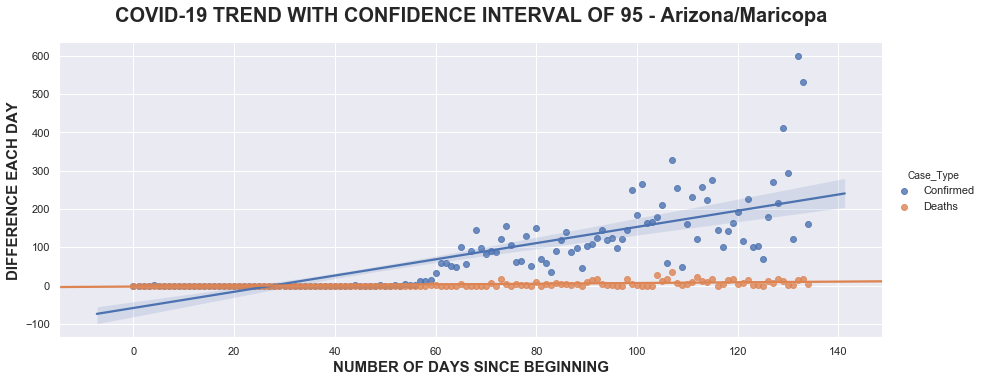

In [83]:
covid_state = covid_df.loc[(covid_df['Province_State'] == state_name)
                          & (covid_df['Admin2']== county_name)]

covid_state['date_delta'] = (covid_state['Date'] - covid_state['Date'].min())  / np.timedelta64(1,'D')

rcParams['figure.figsize'] = 15, 8

sb.set(style="darkgrid")
#ax = sb.lineplot(y=('Difference'), x='Date', hue='Case_Type', hue_order=('Confirmed','Deaths'), linewidth=4, marker='.',ci=95 , markersize=10, data=covid_state)
ax = sb.lmplot(y=('Difference'), x='date_delta', hue='Case_Type', hue_order=('Confirmed','Deaths'), ci=95 ,aspect=2.5, data=covid_state)


#ax.set_title(f"COVID-19 DATA WITH CONFIDENCE INTERVAL OF 95 - {state_name}/{county_name}",fontweight='bold',fontsize=20,position=[.5,1.05])
#ax.set_xlabel('DATE',fontweight='bold',fontsize=15)
#ax.set_ylabel('MEAN DIFFERENCE EACH DAY',fontweight='bold',fontsize=15)

axes = ax.axes.flatten()
axes[0].set_title(f"COVID-19 TREND WITH CONFIDENCE INTERVAL OF 95 - {state_name}/{county_name}",fontweight='bold',fontsize=20,position=[.5,1.05])
axes[0].set_ylabel('DIFFERENCE EACH DAY',fontweight='bold',fontsize=15)
for ax in axes:
    ax.set_xlabel('NUMBER OF DAYS SINCE BEGINNING',fontweight='bold',fontsize=15)

C:\Users\Chester Qualls\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


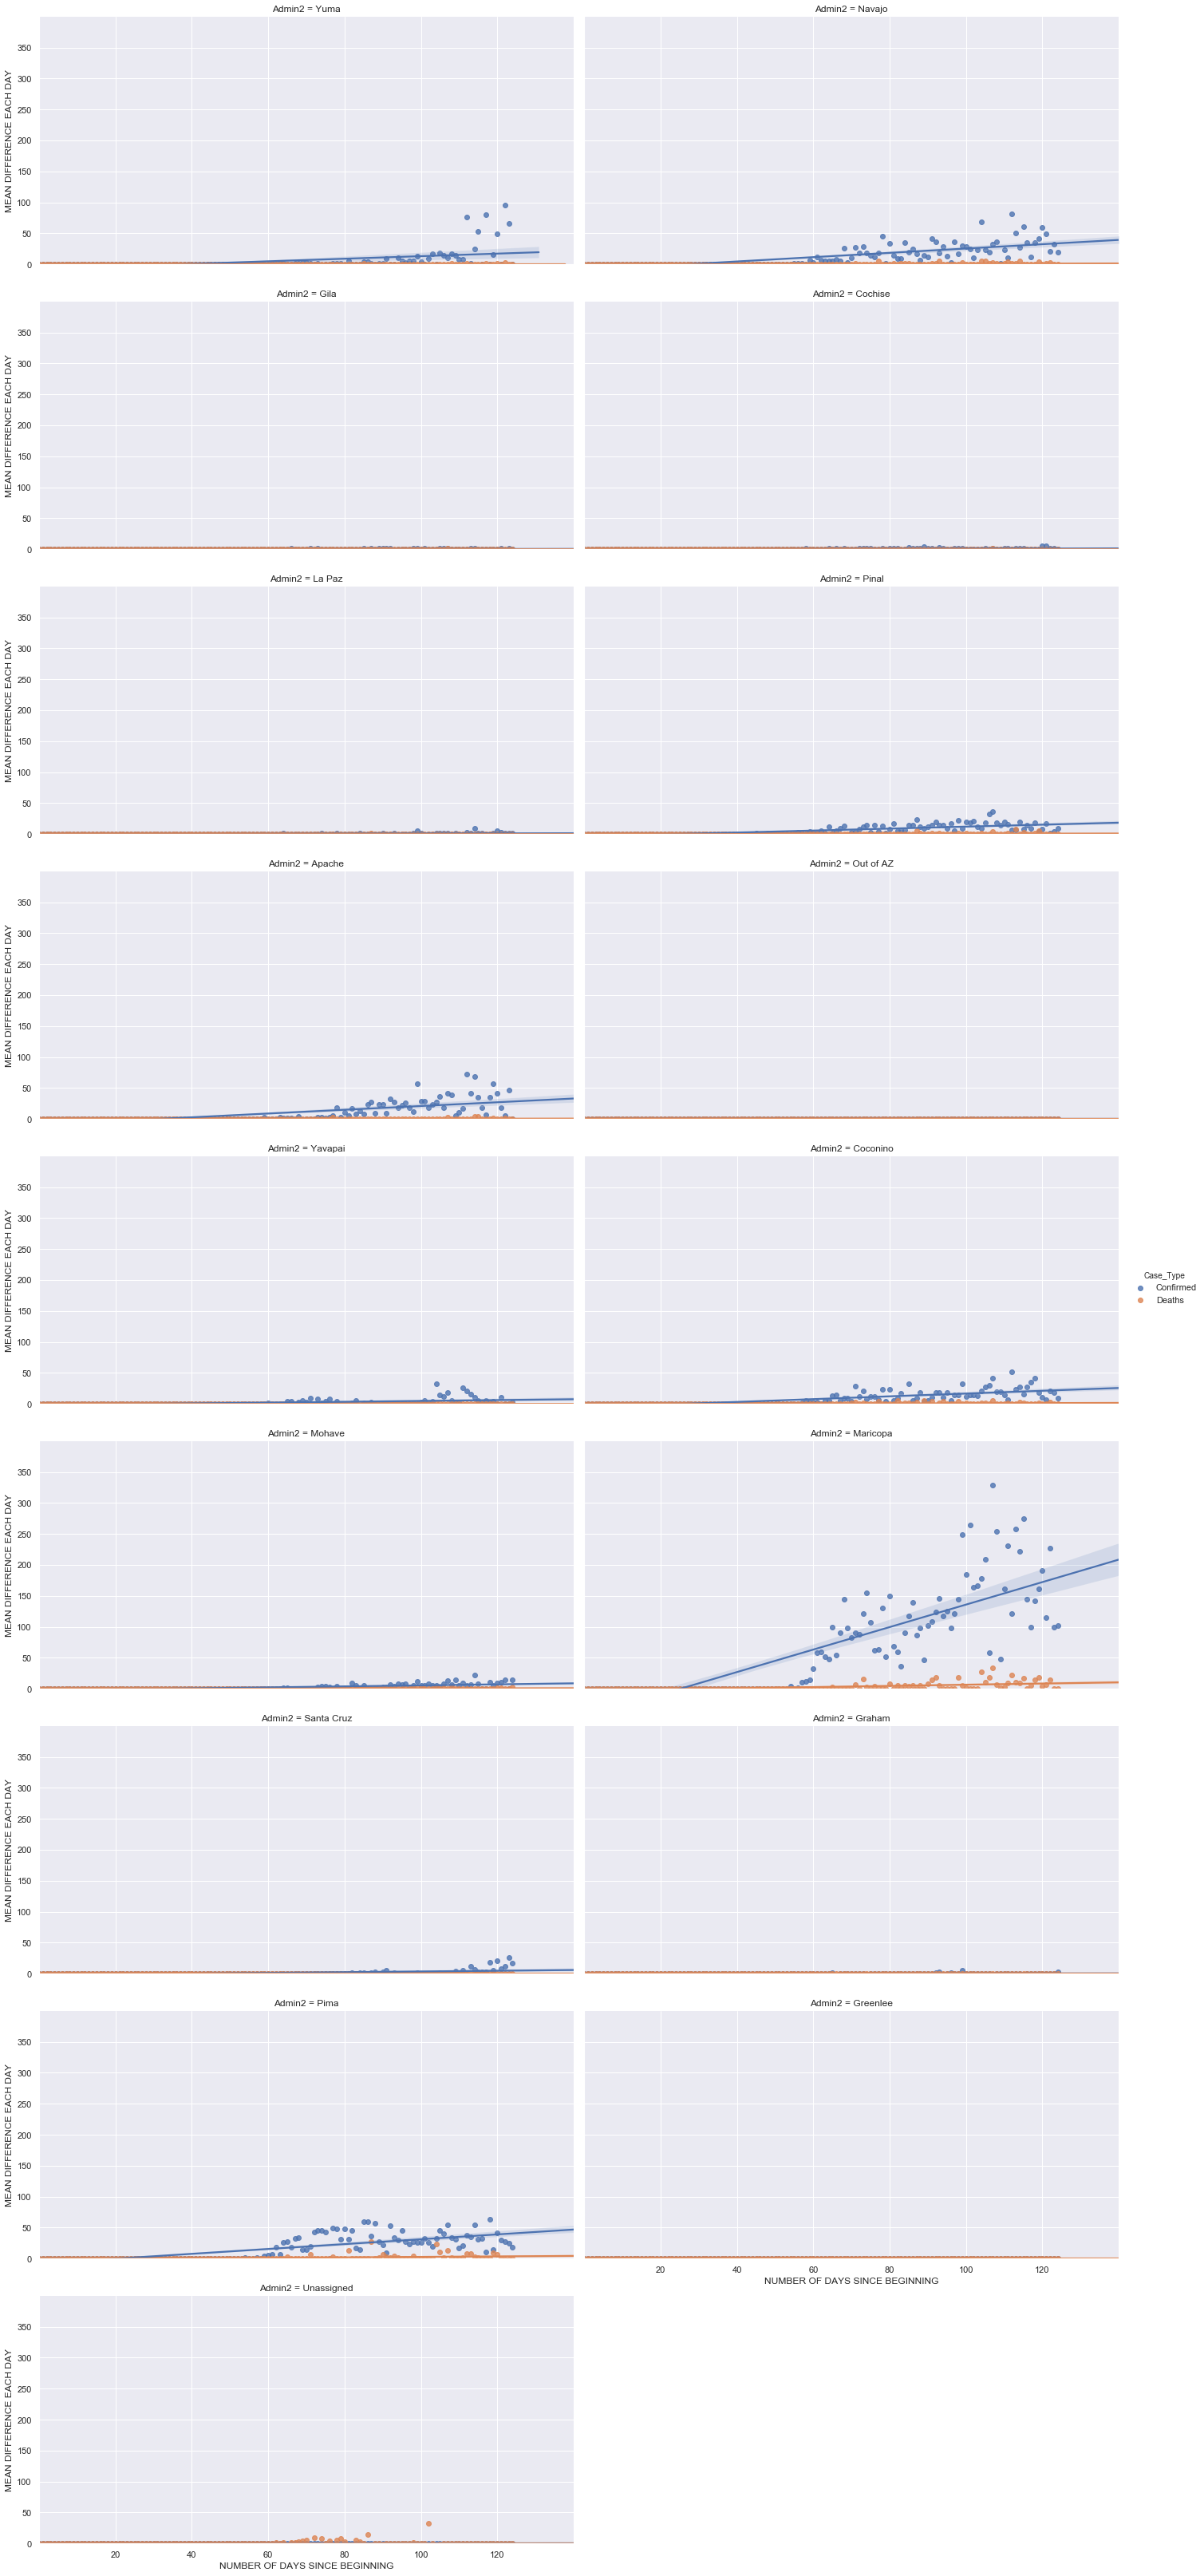

In [124]:
covid_state = covid_df.loc[(covid_df['Province_State'] == state_name)]

covid_state['date_delta'] = (covid_state['Date'] - covid_state['Date'].min())  / np.timedelta64(1,'D')

rcParams['figure.figsize'] = 15, 8

sb.set(style="darkgrid")
#ax = sb.lineplot(y=('Difference'), x='Date', hue='Case_Type', hue_order=('Confirmed','Deaths'), linewidth=4, marker='.',ci=95 , markersize=10, data=covid_state)
ax = sb.lmplot(x='date_delta',y='Difference', hue='Case_Type', hue_order=('Confirmed','Deaths'),col='Admin2', col_wrap=2, ci=95 ,aspect=2, data=covid_state)

ax = (ax.set_axis_labels("NUMBER OF DAYS SINCE BEGINNING", "MEAN DIFFERENCE EACH DAY")
      .set(xlim=(0, 140), ylim=(0, 400),
           xticks=[20,40,60,80,100,120], yticks=[0,50,100,150,200,250,300,350])
      .fig.subplots_adjust(wspace=.02))


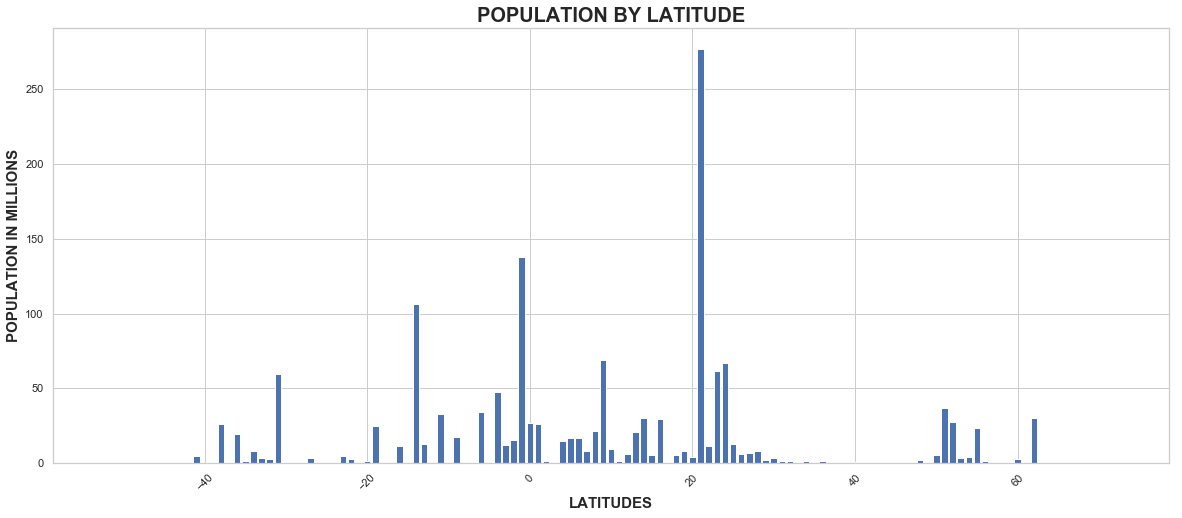

In [182]:
lat_pop = covid_df.groupby(['Lat2'],as_index=False).agg({'Population_Count': ['mean']}).sort_values('Lat2')
#lat_pop = lat_pop.rename(columns={'mean':''}, inplace=False)
lat_pop['per_m'] = lat_pop['Population_Count']/1000000

rcParams['figure.figsize'] = 20, 8

sb.set(style="whitegrid")

plt.bar(lat_pop['Lat2'],lat_pop['per_m'])
plt.xlabel('LATITUDES',fontweight='bold',fontsize=15)
plt.ylabel('POPULATION IN MILLIONS',fontweight='bold',fontsize=15)
plt.title('POPULATION BY LATITUDE',fontweight='bold',fontsize=20)


plt.xticks(rotation=45)
plt.show()


In [51]:
round(40.58)

41

In [127]:
covid_bylat = covid_df.loc[(covid_df['Country_Region'] == country_name)]

#covid_bylat = covid_bylat.loc[(covid_bylat['Province_State'] == 'Arizona') & (covid_bylat['Lat2'] == 33)].groupby(['Lat2','Province_State', 'Case_Type'],
covid_bylat = covid_bylat.loc[(covid_bylat['Province_State'] == 'Arizona')].groupby(['Lat2','Province_State', 'Case_Type'],
#covid_bylat = covid_bylat.groupby(['Lat2','Province_State', 'Case_Type'],
            as_index=False).agg({'Difference': ['sum'],'Population_Count': ['sum']}).sort_values(['Province_State','Lat2'])

covid_bylat = covid_bylat.rename(columns={'sum':''}, inplace=False)

covid_bylat['per_100k'] = covid_bylat['Difference']/(covid_bylat['Population_Count']/100000)
covid_bylat['percent_risk'] = (covid_bylat['per_100k']/100000)*100

covid_bylat[['Province_State','Lat2','Case_Type','per_100k','percent_risk']].sort_values(['Province_State','Lat2']).loc[(covid_bylat['Case_Type'] == 'Confirmed')]

,Province_State,Lat2,Case_Type,per_100k,percent_risk
,,,,,
0,Arizona,32.0,Confirmed,1.502666,0.001503
2,Arizona,33.0,Confirmed,1.510846,0.001511
4,Arizona,34.0,Confirmed,0.798658,0.000799
6,Arizona,35.0,Confirmed,5.784978,0.005785
8,Arizona,36.0,Confirmed,3.029886,0.003030


In [128]:
covid_usa = covid_df.loc[(covid_df['Country_Region'] == country_name)].groupby(['Case_Type'],
            as_index=False).agg({'Difference': ['sum'],'Population_Count': ['sum']})

covid_usa = covid_usa.rename(columns={'sum':''}, inplace=False)

covid_usa['per_100k'] = covid_usa['Difference']/(covid_usa['Population_Count']/100000)
covid_usa['percent_risk'] = (covid_usa['per_100k']/100000)*100

covid_usa[['Case_Type','per_100k','percent_risk']]

,Case_Type,per_100k,percent_risk
,,,
0,Confirmed,3.914729,0.003915
1,Deaths,0.231323,0.000231


In [130]:
covid_bycounty = covid_df.loc[(covid_df['Country_Region'] == country_name)]

#covid_bycounty = covid_bycounty.loc[(covid_bycounty['Province_State'] == 'Arizona') & (covid_bycounty['Lat2'] == 33)].groupby(['Lat2','Province_State', 'Case_Type'],
covid_bycounty = covid_bycounty.loc[(covid_bycounty['Province_State'] == 'Arizona')].groupby(['Admin2','Province_State', 'Case_Type'],
            as_index=False).agg({'Difference': ['sum'],'Population_Count': ['sum']}).sort_values(['Province_State','Admin2'])

covid_bycounty = covid_bycounty.rename(columns={'sum':''}, inplace=False)

covid_bycounty['per_100k'] = covid_bycounty['Difference']/(covid_bycounty['Population_Count']/100000)
covid_bycounty['percent_risk'] = (covid_bycounty['per_100k']/100000)*100

#covid_bycounty[['Province_State','Admin2','Case_Type','per_100k','percent_risk']].sort_values(['per_100k']).loc[(covid_bycounty['Case_Type'] == 'Deaths') & (covid_bycounty['per_100k'] > .00000)]
covid_bycounty[['Province_State','Admin2','Case_Type','per_100k','percent_risk']].sort_values(['per_100k']).loc[(covid_bycounty['Case_Type'] == 'Deaths')]
#covid_bycounty[['Province_State','Admin2','Case_Type','per_100k','percent_risk']].sort_values(['per_100k']).loc[(covid_bycounty['Admin2'] == 'Travis')]
#covid_bycounty[['Province_State','Admin2','Case_Type','per_100k','percent_risk']].sort_values(['Province_State','Admin2']).loc[(covid_bycounty['Case_Type'] == 'Confirmed')]

,Province_State,Admin2,Case_Type,per_100k,percent_risk
,,,,,
27,Arizona,Santa Cruz,Deaths,0.000000,0.000000
11,Arizona,Greenlee,Deaths,0.000000,0.000000
9,Arizona,Graham,Deaths,0.000000,0.000000
3,Arizona,Cochise,Deaths,0.006353,0.000006
7,Arizona,Gila,Deaths,0.014810,0.000015
31,Arizona,Yavapai,Deaths,0.020417,0.000020
33,Arizona,Yuma,Deaths,0.037420,0.000037
13,Arizona,La Paz,Deaths,0.037900,0.000038
25,Arizona,Pinal,Deaths,0.063960,0.000064


In [18]:
covid_bydatelat = covid_bydate.groupby(['Lat2', 'Date', 'Case_Type'],
            as_index=False).agg({'Difference': ['sum'],'Population_Count': ['sum']}).sort_values('Lat2')

covid_bydatelat = covid_bydatelat.rename(columns={'sum':''}, inplace=False)

covid_bydatelat['per_100k'] = covid_bydatelat['Difference']/(covid_bydatelat['Population_Count']/100000)

print(covid_bydatelat[4750:7000])

      Lat2       Date  Case_Type Difference Population_Count   per_100k
                                                                       
4648  35.0 2020-02-20  Confirmed          0       17456199.0   0.000000
4649  35.0 2020-02-20     Deaths          0       17456199.0   0.000000
4650  35.0 2020-02-21  Confirmed          0       17456199.0   0.000000
4651  35.0 2020-02-21     Deaths          0       17456199.0   0.000000
4652  35.0 2020-02-22  Confirmed          0       17456199.0   0.000000
4653  35.0 2020-02-22     Deaths          0       17456199.0   0.000000
4639  35.0 2020-02-15     Deaths          0       17456199.0   0.000000
4654  35.0 2020-02-23  Confirmed          0       17456199.0   0.000000
4622  35.0 2020-02-07  Confirmed          0       17456199.0   0.000000
4620  35.0 2020-02-06  Confirmed          0       17456199.0   0.000000
4590  35.0 2020-01-22  Confirmed          0       17456199.0   0.000000
4591  35.0 2020-01-22     Deaths          0       17456199.0   0

In [113]:
covid_bydatelat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9476 entries, 0 to 9475
Data columns (total 6 columns):
(Lat2, )                9476 non-null float64
(Date, )                9476 non-null datetime64[ns]
(Case_Type, )           9476 non-null object
(Difference, )          9476 non-null int64
(Population_Count, )    9476 non-null float64
(per_100k, )            9476 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 518.2+ KB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text xticklabel objects>)

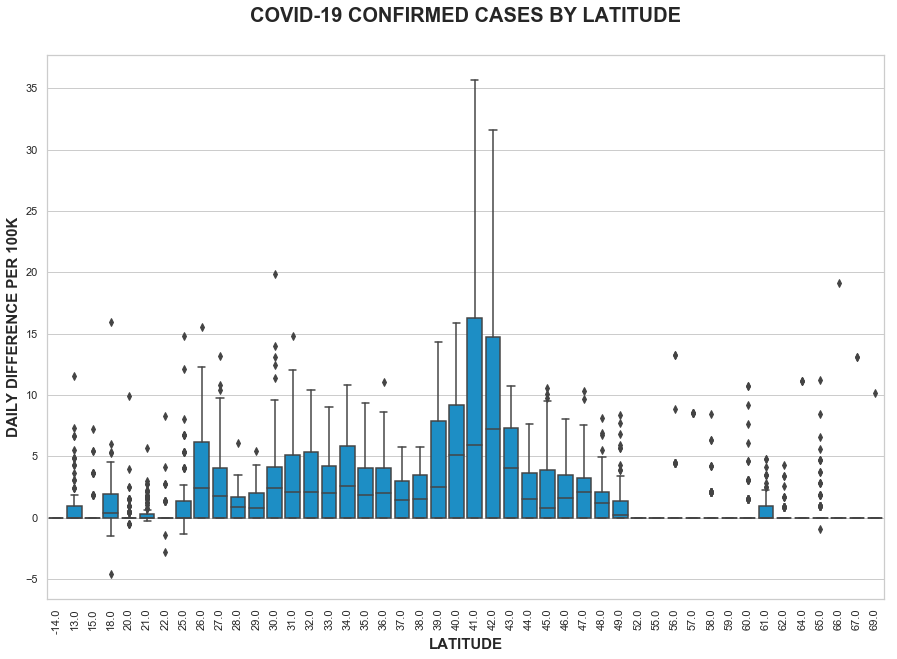

In [19]:
rcParams['figure.figsize'] = 15, 10

sb.set(style="whitegrid")

ax = sb.boxplot(y=('per_100k'), x='Lat2', color='#0198E1', data=covid_bydatelat.loc[(covid_bydatelat['Case_Type'] == 'Confirmed')])
ax.set_title("COVID-19 CONFIRMED CASES BY LATITUDE",fontweight='bold',fontsize=20,position=[.5,1.05])

ax.set_xlabel('LATITUDE',fontweight='bold',fontsize=15)
ax.set_ylabel('DAILY DIFFERENCE PER 100K',fontweight='bold',fontsize=15)

#ax.set_yticks([0,10,20,30,40])#for mean
#ax.set_yticks([0,500,1000,1500,2000,2500,3000,3500,4000])#for sum

plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]), <a list of 41 Text xticklabel objects>)

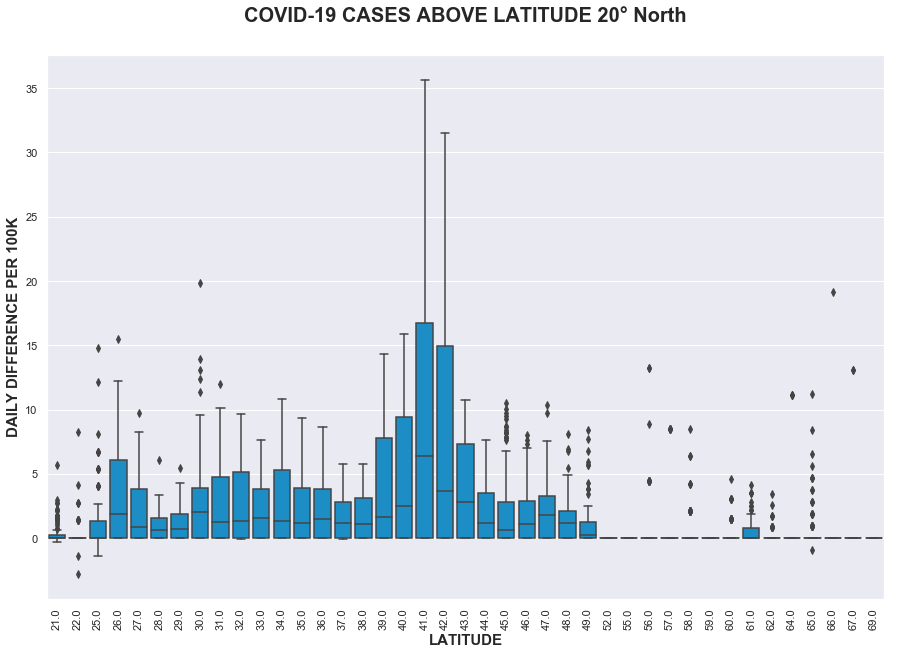

In [42]:
rcParams['figure.figsize'] = 15, 10

sb.set(style="darkgrid")
#ax = sb.lineplot(y=('Difference'), x='Date', hue='Lat2', linewidth=4, marker='.',ci=95 , markersize=10, palette='rainbow', data=covid_bydatelat.loc[(covid_bydatelat['Case_Type'] == 'Deaths')])
#ax = sb.lineplot(y=('Difference'), x='Date', linewidth=4, marker='.',ci=95 , markersize=10, data=covid_df.query("Case_Type == 'Deaths'"))

ax = sb.boxplot(y=('per_100k'), x='Lat2', color='#0198E1', data=covid_bydatelat.loc[(covid_bydatelat['Case_Type'] == 'Confirmed') & (covid_bydatelat['Lat2'] > 20) & (covid_bydatelat['Lat2'] < 100)])
ax.set_title("COVID-19 CASES ABOVE LATITUDE 20° North",fontweight='bold',fontsize=20,position=[.5,1.05])

ax.set_xlabel('LATITUDE',fontweight='bold',fontsize=15)
ax.set_ylabel('DAILY DIFFERENCE PER 100K',fontweight='bold',fontsize=15)

#ax.set_yticks([0,10,20,30,40])#for mean
#ax.set_yticks([0,500,1000,1500,2000,2500,3000,3500,4000])#for sum

plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text xticklabel objects>)

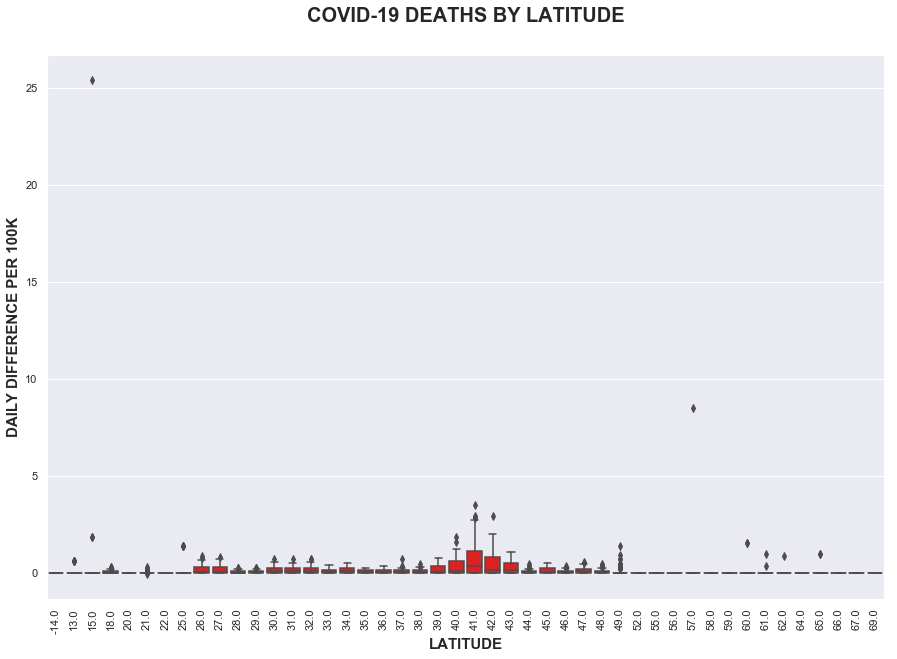

In [20]:
rcParams['figure.figsize'] = 15, 10

sb.set(style="darkgrid")

ax = sb.boxplot(y=('per_100k'), x='Lat2', color='#FF0000', data=covid_bydatelat.loc[(covid_bydatelat['Case_Type'] == 'Deaths')])
ax.set_title("COVID-19 DEATHS BY LATITUDE",fontweight='bold',fontsize=20,position=[.5,1.05])

ax.set_xlabel('LATITUDE',fontweight='bold',fontsize=15)
ax.set_ylabel('DAILY DIFFERENCE PER 100K',fontweight='bold',fontsize=15)

#ax.set_yticks([0,10,20,30,40])#for mean
#ax.set_yticks([0,500,1000,1500,2000,2500,3000,3500,4000])#for sum

plt.xticks(rotation=90)

In [299]:
covid_bydate = covid_bydate.groupby(['Date', 'Case_Type'], as_index=False).agg({'Cases': ['sum']})

covid_bydate

,Date,Case_Type,Cases
,,,sum
0,2020-01-22,Confirmed,1
1,2020-01-22,Deaths,0
2,2020-01-23,Confirmed,1
3,2020-01-23,Deaths,0
4,2020-01-24,Confirmed,2
5,2020-01-24,Deaths,0
6,2020-01-25,Confirmed,2
7,2020-01-25,Deaths,0
8,2020-01-26,Confirmed,5


In [47]:
covid_bydate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612880 entries, 41827 to 661571
Data columns (total 19 columns):
Case_Type                               612880 non-null object
People_Total_Tested_Count               1456 non-null float64
Cases                                   612880 non-null int64
Difference                              612880 non-null int64
Date                                    612880 non-null datetime64[ns]
Combined_Key                            612880 non-null object
Country_Region                          612880 non-null object
Province_State                          612880 non-null object
Admin2                                  611940 non-null object
iso2                                    612692 non-null object
iso3                                    612692 non-null object
FIPS                                    591636 non-null float64
Lat                                     593140 non-null float64
Long                                    593140 non-null flo

In [39]:
#Need covid_run for chart(s) below
covid_run = pd.pivot_table(covid_df.loc[(covid_df['Province_State'] == state_name) 
#covid_run = pd.pivot_table(covid_df.loc[(covid_df['Country_Region'] == country_name) 
                        & (covid_df['Province_State'] == state_name)
                        & (covid_df['Date'] >= '1/22/2020') & (covid_df['Date'] <= '5/16/2020')],
                        values=['Cases'], index=['Date'], 
                        columns=['Case_Type'], aggfunc='sum').assign(**covid_run.index.to_frame())

covid_run.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116 entries, 2020-01-22 to 2020-05-16
Data columns (total 3 columns):
(Cases, Confirmed)    116 non-null int64
(Cases, Deaths)       116 non-null int64
(Date, )              116 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 3.6 KB


Text(0,0.5,'HOW MANY TOTAL')

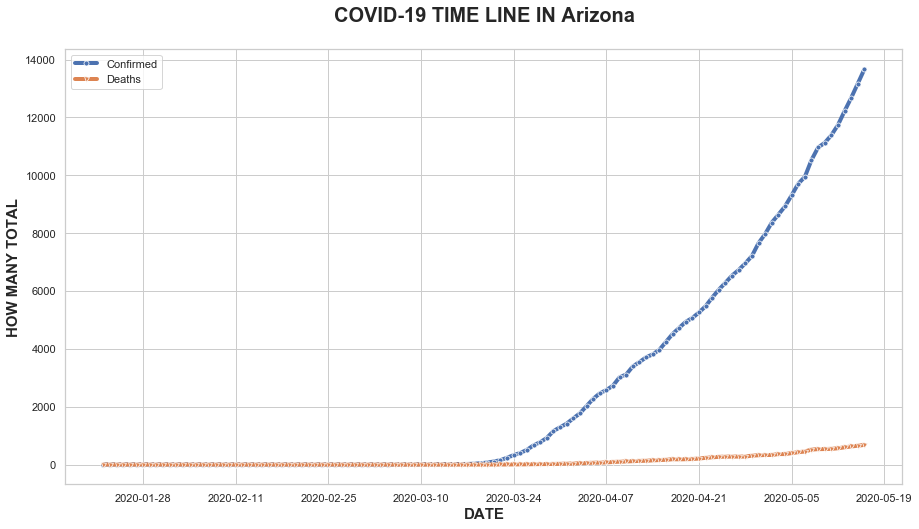

In [37]:
rcParams['figure.figsize'] = 15, 8
sb.set_style('whitegrid')
ax = sb.lineplot(y=('Cases', 'Confirmed'), x='Date', label='Confirmed', linewidth=4, marker='o', markersize=5, data=covid_run)
ax = sb.lineplot(y=('Cases', 'Deaths'), x='Date', label='Deaths', linewidth=4, marker='v', markersize=5, data=covid_run)

ax.set_title(f"COVID-19 TIME LINE IN {state_name}",fontweight='bold',fontsize=20,position=[.5,1.05])
#ax.set_xticklabels('Date', rotation = 45)
ax.set_xlabel('DATE',fontweight='bold',fontsize=15)
ax.set_ylabel('HOW MANY TOTAL',fontweight='bold',fontsize=15)

In [27]:
#Need covid_diff for graph(s) below
covid_diff = pd.pivot_table(covid_df.loc[(covid_df['Province_State'] == state_name)
                        & (covid_df['Admin2'] == county_name)
                        & (covid_df['Date'] >= '1/1/2020')],
                        values=['Difference'], index=['Date'], 
                        columns=['Case_Type'], aggfunc='sum')

covid_diff.assign(**covid_diff.index.to_frame())

print('***Data for', state_name,'/', county_name,'***')
covid_diff


***Data for Arizona / Maricopa ***


Difference       
Case_Type   Confirmed Deaths
Date                        
2020-01-22          0      0
2020-01-23          0      0
2020-01-24          0      0
2020-01-25          0      0
2020-01-26          1      0
2020-01-27          0      0
2020-01-28          0      0
2020-01-29          0      0
2020-01-30          0      0
2020-01-31          0      0
2020-02-01          0      0
2020-02-02          0      0
2020-02-03          0      0
2020-02-04          0      0
2020-02-05          0      0
2020-02-06          0      0
2020-02-07          0      0
2020-02-08          0      0
2020-02-09          0      0
2020-02-10          0      0
2020-02-11          0      0
2020-02-12          0      0
2020-02-13          0      0
2020-02-14          0      0
2020-02-15          0      0
2020-02-16          0      0
2020-02-17          0      0
2020-02-18          0      0
2020-02-19          0      0
2020-02-20          0      0
2020-02-21          0      0
2020-02-22          0      0
2020-02-23          0      0
2020-02-24          0      0
2020-02-25          0      0
2020-02-26          0      0
2020-02-27          0      0
2020-02-28          0      0
2020-02-29          0      0
2020-03-01          0      0
2020-03-02          0      0
2020-03-03          0      0
2020-03-04          0      0
2020-03-05          0      0
2020-03-06          1      0
2020-03-07          0      0
2020-03-08          0      0
2020-03-09          0      0
2020-03-10          0      0
2020-03-11          1      0
2020-03-12          0      0
2020-03-13          0      0
2020-03-14          1      0
2020-03-15          0      0
2020-03-16          4      0
2020-03-17          1      0
2020-03-18          2      0
2020-03-19         11      0
2020-03-20         12      0
2020-03-21         15      1
2020-03-22         32      1
2020-03-23         58      0
2020-03-24         60      0
2020-03-25         52      0
2020-03-26         48      0
2020-03-27        100      3
2020-03-28         55      0
2020-03-29         91      0
2020-03-30        145      0
2020-03-31         98      0
2020-04-01         83      0
2020-04-02         90      7
2020-04-03         88      0
2020-04-04        122     16
2020-04-05        155      3
2020-04-06        107      0
2020-04-07         62      4
2020-04-08         64      2
2020-04-09        130      2
2020-04-10         52      0
2020-04-11        150      8
2020-04-12         69      0
2020-04-13         60      5
2020-04-14         36      2
2020-04-15         90      6
2020-04-16        118      4
2020-04-17        140      5
2020-04-18         87      1
2020-04-19         98      5
2020-04-20         47      0
2020-04-21        102      8
2020-04-22        108     14
2020-04-23        124     18
2020-04-24        146      5
2020-04-25        118      1
2020-04-26        125      1
2020-04-27         98      0
2020-04-28        121      0
2020-04-29        145     18
2020-04-30        249      5
2020-05-01        184      2
2020-05-02        265      0
2020-05-03        164      0
2020-05-04        166      0
2020-05-05        178     28
2020-05-06        209     11
2020-05-07         58     18
2020-05-08        329     34
2020-05-09        254      7
2020-05-10         48      2
2020-05-11        161      3
2020-05-12        231      9
2020-05-13        122     22
2020-05-14        258     11
2020-05-15        222     10
2020-05-16        275     17
2020-05-17        144      0
2020-05-18        100      5
2020-05-19        142     15
2020-05-20        162     18
2020-05-21        191      4
2020-05-22        115      7
2020-05-23        227     15
2020-05-24        100      1
2020-05-25        102      1
2020-05-26         69     -1
2020-05-27        179     13
2020-05-28        269      6
2020-05-29        216     16
2020-05-30        410     11
2020-05-31        293      2
2020-06-01        122      1
2020-06-02        599     15
2020-06-03        532     18
2020-06-04        161      5

In [28]:
#Run covid_diff first
# ************************************************
rcParams['figure.figsize'] = 15, 8
sb.set_style('whitegrid')
ax = sb.lineplot(y=('Difference', 'Confirmed'), x='Date', label='Confirmed Cases', linewidth=4, marker='o', markersize=10, data=covid_diff)
ax = sb.lineplot(y=('Difference', 'Deaths'), x='Date', label='Deaths', linewidth=4, marker='.', markersize=10, data=covid_diff)
#ax = sb.lineplot(y=('Difference', 'Deaths'), x='Date', hue='Province_State', linewidth=4, marker='.', markersize=10, data=covid_diff)

ax.set_title(f"COVID-19 DATA FOR ({state_name}/{county_name})",fontweight='bold',fontsize=20,position=[.5,1.05])

plt.xticks(rotation=45)
ax.set_xlabel('DATE',fontweight='bold',fontsize=15)
ax.set_ylabel('PER DAY',fontweight='bold',fontsize=15)

ValueError: Could not interpret input 'Date'

In [16]:
covid_df

,Case_Type,People_Total_Tested_Count,Cases,Difference,Date,Combined_Key,Country_Region,Province_State,Admin2,iso2,...,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count,Data_Source,Prep_Flow_Runtime,100k_quotient,per_ht,Lat2
0,Confirmed,NaN,0,0,2020-02-03,Switzerland,Switzerland,NaN,NaN,CH,...,NaN,46.818200,8.227500,8.654618e+06,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/15/2020 11:08:58 PM,86.54618,0.000000,47.0
1,Confirmed,NaN,23,0,2020-04-21,Antigua and Barbuda,Antigua and Barbuda,NaN,NaN,AG,...,NaN,17.060800,-61.796400,9.792800e+04,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/15/2020 11:08:58 PM,0.97928,0.000000,17.0
2,Deaths,NaN,0,0,2020-03-01,Cyprus,Cyprus,NaN,NaN,CY,...,NaN,35.126400,33.429900,1.207361e+06,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/15/2020 11:08:58 PM,12.07361,0.000000,35.0
3,Deaths,NaN,56,0,2020-05-11,Thailand,Thailand,NaN,NaN,TH,...,NaN,15.870032,100.992541,6.979998e+07,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/15/2020 11:08:58 PM,697.99978,0.000000,16.0
4,Deaths,NaN,0,0,2020-02-11,Jamaica,Jamaica,NaN,NaN,JM,...,NaN,18.109600,-77.297500,2.961161e+06,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/15/2020 11:08:58 PM,29.61161,0.000000,18.0
5,Confirmed,NaN,0,0,2020-02-06,Belize,Belize,NaN,NaN,BZ,...,NaN,17.189900,-88.497600,3.976210e+05,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/15/2020 11:08:58 PM,3.97621,0.000000,17.0
6,Confirmed,NaN,1,0,2020-03-18,Central African Republic,Central African Republic,NaN,NaN,CF,...,NaN,6.611100,20.939400,4.829764e+06,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/15/2020 11:08:58 PM,48.29764,0.000000,7.0
7,Confirmed,NaN,2710,19,2020-05-09,Greece,Greece,NaN,NaN,GR,...,NaN,39.074200,21.824300,1.042306e+07,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/15/2020 11:08:58 PM,104.23056,0.182288,39.0
8,Deaths,NaN,0,0,2020-05-02,"Bonaire, Sint Eustatius and Saba, Netherlands",Netherlands,"Bonaire, Sint Eustatius and Saba",NaN,BQ,...,NaN,12.178400,-68.238500,2.622100e+04,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/15/2020 11:08:58 PM,0.26221,0.000000,12.0
9,Confirmed,NaN,1,0,2020-03-19,Central African Republic,Central African Republic,NaN,NaN,CF,...,NaN,6.611100,20.939400,4.829764e+06,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/15/2020 11:08:58 PM,48.29764,0.000000,7.0


In [135]:
#covid_world_totals = pd.pivot_table(covid_df, values=['Cases'], columns=['Case_Type'], index=['Date'], aggfunc='sum') #Daily Totals
covid_world_totals = pd.pivot_table(covid_df, values=['Difference'], columns=['Case_Type'], aggfunc='sum')
#covid_world_totals = covid_world_totals.rename(columns={'Cases','Confirmed':'Confirmed'}, inplace=False)
covid_world_totals.columns = covid_world_totals.columns.get_level_values(0)

covid_world_totals['%_Confirmed'] = covid_world_totals['Deaths']/covid_world_totals['Confirmed']*100
covid_world_totals['%_World_Population'] = covid_world_totals['Deaths']/7785000000*100

covid_world_totals

Case_Type,Confirmed,Deaths,%_Confirmed,%_World_Population
Difference,5494909,346229,6.300905,0.004447
